<a href="https://colab.research.google.com/github/Bot1719744/DS5230/blob/main/DS5230_Creditcard_GroupSet1_AffinityPropagation..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyclustering
!pip install openpyxl

## Kaggle: Creditcard
- source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- github repository:


About Dataset

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Acknowledgements from Kaggle

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project



## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Dataset Selection

In [3]:
# Load dataset
df2 = pd.read_csv('/content/creditcard.csv')
df2.head()

# Handle missing values
df2.dropna(inplace=True)

# Standardize numerical features
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2.select_dtypes(include=[np.number]))



## Dimensionality Reduction

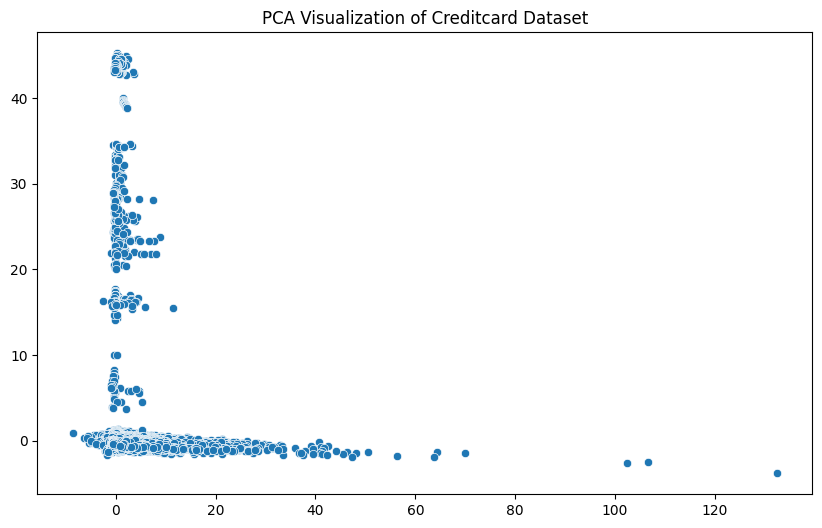

In [4]:
#Dimensionality Reduction using PCA
pca = PCA(n_components=2)
df2_pca = pca.fit_transform(df2_scaled)

# Visualize Dataset_2 PCA Results
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2_pca[:, 0], y=df2_pca[:, 1])
plt.title("PCA Visualization of Creditcard Dataset")
plt.show()


## Clustering Implementation

In [ ]:
# Apply Affinity Propagation
# This is how we apple AP, but the session will crash if use the whole dataset
# from sklearn.cluster import AffinityPropagation
# import matplotlib.pyplot as plt
# import seaborn as sns

# affinity_propagation = AffinityPropagation(damping=0.9, max_iter=500, affinity='euclidean')
# df2['cluster'] = affinity_propagation.fit_predict(df2_pca)

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=df2_pca[:, 0], y=df2_pca[:, 1], hue=df2['cluster'], palette='viridis', legend='full')
# plt.title("Affinity Propagation Clustering on PCA-Transformed Creditcard Dataset")
# plt.xlabel("PCA Component 1")
# plt.ylabel("PCA Component 2")
# plt.legend(title='Cluster')
# plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


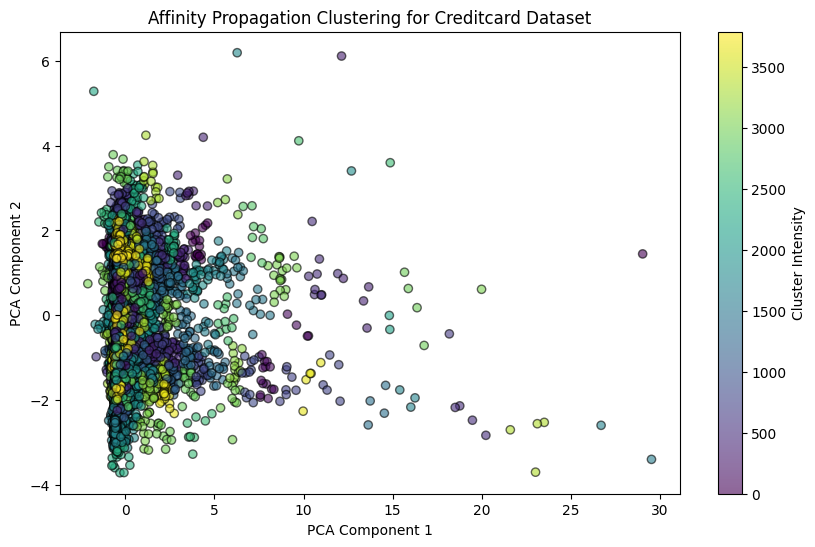

In [5]:
from sklearn.cluster import AffinityPropagation

sample_size = 16000 # The session will crush if I don't use a sample data here (Take about almost 20 mins for 16000 data, number higher than 16000 won't be work for AP)
df2_sampled = df2.sample(sample_size, random_state=42)
df2_sampled_scaled = scaler.fit_transform(df2_sampled.select_dtypes(include=[np.number]))
df2_sampled_pca = pca.fit_transform(df2_sampled_scaled)

affinity_prop = AffinityPropagation(damping=0.5, max_iter=200, affinity='euclidean')
affinity_labels = affinity_prop.fit_predict(df2_sampled_pca)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df2_sampled_pca[:, 0], df2_sampled_pca[:, 1], c=affinity_labels, cmap='viridis', alpha=0.6, edgecolor='k')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Intensity')
plt.title("Affinity Propagation Clustering for Creditcard Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [6]:
num_clusters = len(set(affinity_labels)) - (1 if -1 in affinity_labels else 0)
print(f"Number of clusters: {num_clusters}")

Number of clusters: 3793


In [8]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AffinityPropagation

silhouette_avg = silhouette_score(df2_sampled_pca, affinity_labels)
davies_bouldin = davies_bouldin_score(df2_sampled_pca, affinity_labels)
calinski_harabasz = calinski_harabasz_score(df2_sampled_pca, affinity_labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.13505188765535395
Davies-Bouldin Index: 0.41237687115104377
Calinski-Harabasz Index: 788.1775773770871
